<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%5B6_1%5D%EA%B3%A0%EA%B0%9D%EB%93%B1%EA%B8%89%EC%98%88%EC%B8%A1_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

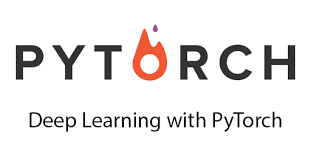

# 고객특성을 보고 등급을 예측하여 보자

In [0]:
## 필요한 라이브러리 불러오기
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split;  from matplotlib import style
from torch.autograd import Variable
from __future__ import print_function; from torch import nn, optim, cuda, tensor
from torch.utils import data; from torchvision import datasets, transforms
import torch.nn.functional as F ; import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
import torch; from torch.autograd import Variable

# ‘customer1500.csv’ 파일을 구글 드라이브에 마운트 한 다음 데이터 파일을 불러오자




In [0]:
dat = np.array(pd.read_csv('customer1500.csv'))

y=dat[:,0]; x=dat[:,1:65] #  y=3개의 고객상태 label(0/1/2), x=64개의 특성벡터
class_names = ['buy NONE', 'buy SMALL', 'buy BIG']   

## 훈련과 검증셋으로 나누기
x_train=x[0:1000,]; x_test=x[1000:1499,]
y_train=y[0:1000,]; y_test=y[1000:1499,]

# 토치 모맷으로 데이터 바꾸기
x_train = Variable(torch.Tensor(x_train).float())
x_test = Variable(torch.Tensor(x_test).float())
y_train = Variable(torch.Tensor(y_train).long())   ## long =정수
y_test = Variable(torch.Tensor(y_test).long())

print(x_train.shape, y_train.shape)

torch.Size([1000, 64]) torch.Size([1000])


# 모형 설정

In [0]:
class Net(nn.Module):

    def __init__(self):    ## 레이어 구조 설정 (뉴론의 수)
        super(Net, self).__init__()
        #self.l1 = nn.Linear(64, 20)   ## 다양한 층으로 구성가능하다  
        #self.l2 = nn.Linear(20, 10)    
        #self.l3 = nn.Linear(10, 6)    
        #self.l4 = nn.Linear(6, 4)    
        self.l5 = nn.Linear(64, 3)    ## 아웃풋레이어

    def forward(self, x):  ## 연산방법과 활성화함수 설정
        #x = F.relu(self.l1(x))
        #x = F.relu(self.l2(x))
        #x = F.relu(self.l3(x))
        #x = F.relu(self.l4(x))
        return self.l5(x)               ## no softmax here

model = Net()
criterion = nn.CrossEntropyLoss()    ## 손실함수 지정
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)   ## 최적화모듈 지정


# 학습 실행

In [0]:
nb_epochs = 5000   # 학습횟수, 배치=all

for epoch in range(nb_epochs+1 ):
    hypothesis = model(x_train)            # f(x) 계산
    loss = criterion(hypothesis, y_train)  # loss 계산
    loss.backward()                        # 백프로파게이션 for gradient
    optimizer.step()                       # 파라미터 업데이트 
  
    if epoch % 100 == 0:
        print('number of epoch=','[%d] loss: %.3f' %
                  ( epoch ,loss.data))
  
## 츨력사항 지정
predict_out = model(x_test)
_, predict_y = torch.max(predict_out, 1)
print('===================>>>>>>')
print('test-set prediction accuracy = ', np.round(100*accuracy_score(y_test.data, predict_y.data),2), "%")

number of epoch= [0] loss: 2.486
number of epoch= [100] loss: 0.201
number of epoch= [200] loss: 0.028
number of epoch= [300] loss: 0.526
number of epoch= [400] loss: 2.434
number of epoch= [500] loss: 6.464
number of epoch= [600] loss: 5.600
number of epoch= [700] loss: 1.139
number of epoch= [800] loss: 0.112
number of epoch= [900] loss: 0.000
number of epoch= [1000] loss: 0.082
number of epoch= [1100] loss: 0.889
number of epoch= [1200] loss: 3.570
number of epoch= [1300] loss: 6.140
number of epoch= [1400] loss: 3.433
number of epoch= [1500] loss: 1.087
number of epoch= [1600] loss: 0.236
number of epoch= [1700] loss: 0.087
number of epoch= [1800] loss: 0.135
number of epoch= [1900] loss: 1.499
number of epoch= [2000] loss: 5.537
number of epoch= [2100] loss: 5.841
number of epoch= [2200] loss: 1.896
number of epoch= [2300] loss: 0.209
number of epoch= [2400] loss: 0.471
number of epoch= [2500] loss: 1.008
number of epoch= [2600] loss: 1.656
number of epoch= [2700] loss: 3.012
numb

# 예측결과 평가하기

In [0]:
from sklearn.metrics import confusion_matrix, classification_report; import seaborn as sn
yhat=torch.argmax(model(x_test),axis=1)
cm=confusion_matrix(y_test, yhat)
cm

array([[ 77,  13,   0],
       [  3, 225,   5],
       [  0,  17, 159]])

대각선은 올바른 예측


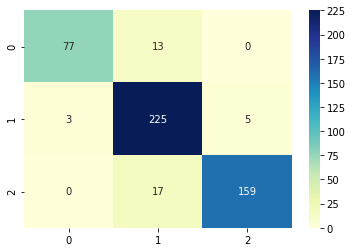

In [0]:
import pandas as pd
import seaborn as sn
print('대각선은 올바른 예측')
sn.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

In [0]:
print(classification_report(y_test, yhat, target_names=class_names))


              precision    recall  f1-score   support

    buy NONE       0.96      0.86      0.91        90
   buy SMALL       0.88      0.97      0.92       233
     buy BIG       0.97      0.90      0.94       176

    accuracy                           0.92       499
   macro avg       0.94      0.91      0.92       499
weighted avg       0.93      0.92      0.92       499



# 예측하기

In [0]:
# 예측하기 
i=29
x_new= x_test[i]; 
print('x=', x_new.data)
yhat = F.softmax(model(x_new),0)
print()
print('y=', torch.argmax(yhat))
print('Expected probability=', yhat.data)
#EOF

x= tensor([1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

y= tensor(2)
Expected probability= tensor([0., 0., 1.])
